<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#purpose" data-toc-modified-id="purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>purpose</a></span></li><li><span><a href="#scan-result-contour-plots-in-R" data-toc-modified-id="scan-result-contour-plots-in-R-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>scan result contour plots in R</a></span><ul class="toc-item"><li><span><a href="#$x$=low,-$a_P$=low" data-toc-modified-id="$x$=low,-$a_P$=low-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$x$=low, $a_P$=low</a></span></li><li><span><a href="#$x$=low,-$a_P$=high" data-toc-modified-id="$x$=low,-$a_P$=high-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>$x$=low, $a_P$=high</a></span></li><li><span><a href="#$x$=high,-$a_P$=low" data-toc-modified-id="$x$=high,-$a_P$=low-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>$x$=high, $a_P$=low</a></span></li><li><span><a href="#$x$=high,-$a_P$=high" data-toc-modified-id="$x$=high,-$a_P$=high-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>$x$=high, $a_P$=high</a></span></li><li><span><a href="#$x$=mid,-$a_P$=mid" data-toc-modified-id="$x$=mid,-$a_P$=mid-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>$x$=mid, $a_P$=mid</a></span></li></ul></li><li><span><a href="#numerical-analysis-on-temporal-axis" data-toc-modified-id="numerical-analysis-on-temporal-axis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>numerical analysis on temporal axis</a></span><ul class="toc-item"><li><span><a href="#$g_P$=low,-$g_B$=low" data-toc-modified-id="$g_P$=low,-$g_B$=low-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>$g_P$=low, $g_B$=low</a></span></li><li><span><a href="#$g_P$=low,-$g_B$=high" data-toc-modified-id="$g_P$=low,-$g_B$=high-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>$g_P$=low, $g_B$=high</a></span></li><li><span><a href="#$g_P$=high,-$g_B$=low" data-toc-modified-id="$g_P$=high,-$g_B$=low-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>$g_P$=high, $g_B$=low</a></span></li><li><span><a href="#$g_P$=high,-$g_B$=high" data-toc-modified-id="$g_P$=high,-$g_B$=high-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>$g_P$=high, $g_B$=high</a></span></li></ul></li></ul></div>

# purpose
This notebook is for plotting of eqm positions analytically (equation solving) and numerically (integrating) of CPB ODE open system

In [1]:
using RCall, PyCall, DataFrames, CSV, Plots, SymPy
sc = pyimport("scipy")
cst = pyimport("scipy.constants")
itg = pyimport("scipy.integrate")
sympy.init_printing()
R"library(lattice)"
println()

# scan result contour plots in R

In [2]:
#rAw = CSV.read("../result/maxYield_0.05.csv")
rAw = CSV.read("../result/maxYield_1.0e-5.csv")
@rput rAw
R"
uNiqRAW = vector(mode='list')
for(i in 1:9){uNiqRAW[[i]]<-unique(rAw[,i])};rm(i)
uNiqRAW
"

RObject{VecSxp}
[[1]]
  [1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

[[2]]
[1] 0.875

[[3]]
[1] 0.63

[[4]]
 [1] 0.2590 0.2888 0.3184 0.3481 0.3780 0.4075 0.4373 0.4670 0.4966 0.5264
[11] 0.5560

[[5]]
 [1] 0.0010 0.0409 0.0808 0.1207 0.1606 0.2004 0.2404 0.2803 0.3203 0.3600
[11] 0.4000

[[6]]
[1] 0.6

[[7]]
[1] 0.55

[[8]]
  [1] 0.707 0.790 0.873 0.956 1.039 1.122 1.205 1.288 1.371 1.454 1.537 1.620
 [13] 1.703 1.786 1.869 1.952 2.035 2.120 2.201 2.285 2.367 2.451 2.533 2.617
 [25] 2.700 2.78

In [3]:
R"
gPBmap = function(z,cRi,rAw,uNiqRAW){
## cRi = c(rep(1,3),0,rep(1,3),0,1) #set-up filter criteria (=position) & xy axis (=0)
pInt = rAw ## set-up data details to be filtered by iteration
xyAxis = which(cRi==0)

for(i in 1:9){
if(cRi[i]>0){
    pInt = pInt[which(pInt[,i]==uNiqRAW[[i]][cRi[i]]),] ## trim data
}};rm(i)

## plot heatmaps
levelplot(pInt[,z]~pInt[,xyAxis[1]]*pInt[,xyAxis[2]], xlab=colnames(pInt)[xyAxis[1]], ylab=colnames(pInt)[xyAxis[2]], col.regions = rev(gray(0:100/100)), main = paste0('Heatmap of ',colnames(pInt)[z],' gC/m^3 with\nC-rm rate ',uNiqRAW[[1]][cRi[1]],' t^-1 & aP ',uNiqRAW[[5]][cRi[5]],' m^3/(gC t)'))
}
"
println()

In [4]:
R"
cRiteria = as.data.frame(matrix(NA,nc=5,nr=9))
cRiteria[,1] = c(1,1,1,0,1,1,1,0,1) ##LL
cRiteria[,2] = c(1,1,1,0,length(uNiqRAW[[5]]),1,1,0,1) ##LH
cRiteria[,3] = c(length(uNiqRAW[[1]]),1,1,0,1,1,1,0,1) ##HL
cRiteria[,4] = c(length(uNiqRAW[[1]]),1,1,0,length(uNiqRAW[[5]]),1,1,0,1) ##HH
cRiteria[,5] = c(round(length(uNiqRAW[[1]])/2),1,1,0,round(length(uNiqRAW[[5]])/2),1,1,0,1) ##MM
"

RObject{RealSxp}
[1] 50  1  1  0  6  1  1  0  1


## $x$=low, $a_P$=low

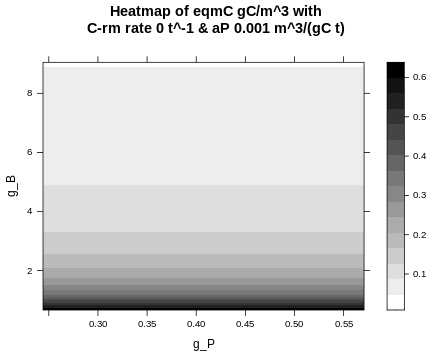

RObject{VecSxp}


In [5]:
R"gPBmap(10, cRiteria[,1], rAw, uNiqRAW)"

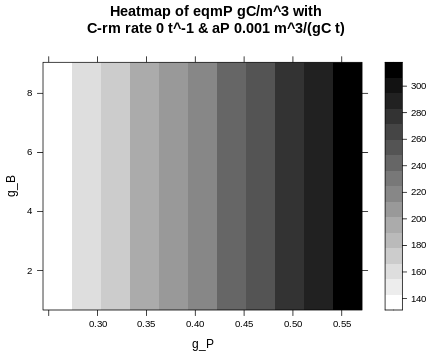

RObject{VecSxp}


In [6]:
R"gPBmap(11, cRiteria[,1], rAw, uNiqRAW)"

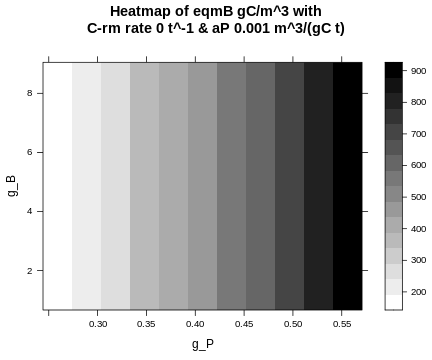

RObject{VecSxp}


In [7]:
R"gPBmap(12, cRiteria[,1], rAw, uNiqRAW)"

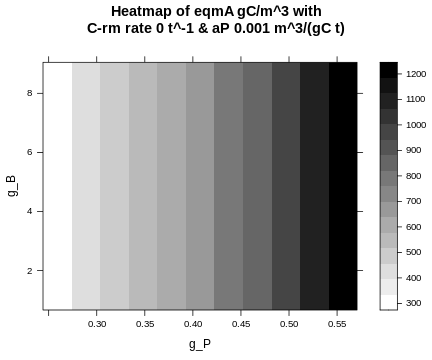

RObject{VecSxp}


In [8]:
R"gPBmap(13, cRiteria[,1], rAw, uNiqRAW)"

## $x$=low, $a_P$=high

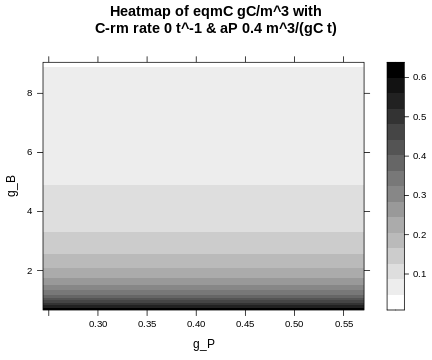

RObject{VecSxp}


In [9]:
R"gPBmap(10, cRiteria[,2], rAw, uNiqRAW)"

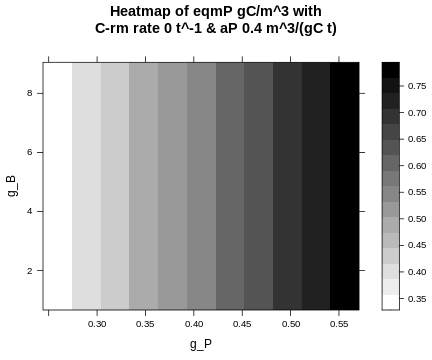

RObject{VecSxp}


In [10]:
R"gPBmap(11, cRiteria[,2], rAw, uNiqRAW)"

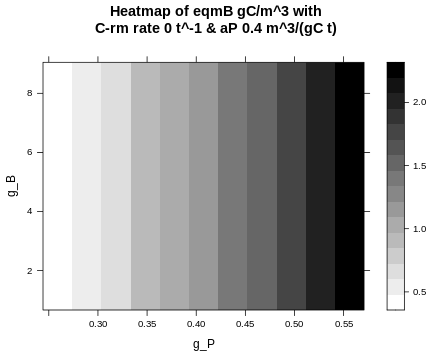

RObject{VecSxp}


In [11]:
R"gPBmap(12, cRiteria[,2], rAw, uNiqRAW)"

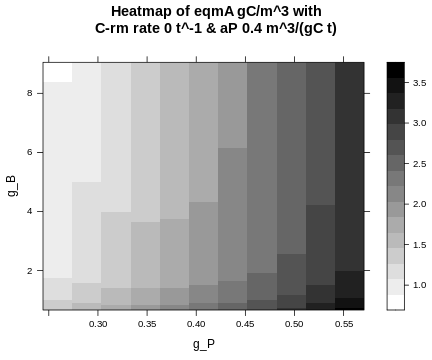

RObject{VecSxp}


In [12]:
R"gPBmap(13, cRiteria[,2], rAw, uNiqRAW)"

## $x$=high, $a_P$=low

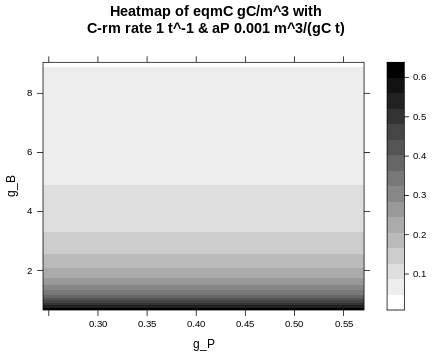

RObject{VecSxp}


In [13]:
R"gPBmap(10, cRiteria[,3], rAw, uNiqRAW)"

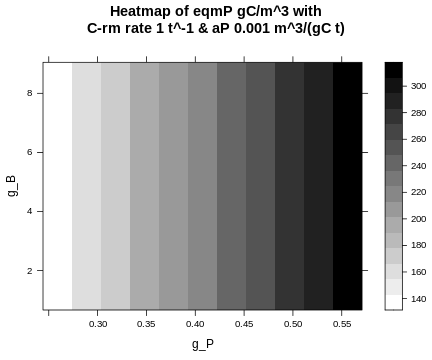

RObject{VecSxp}


In [14]:
R"gPBmap(11, cRiteria[,3], rAw, uNiqRAW)"

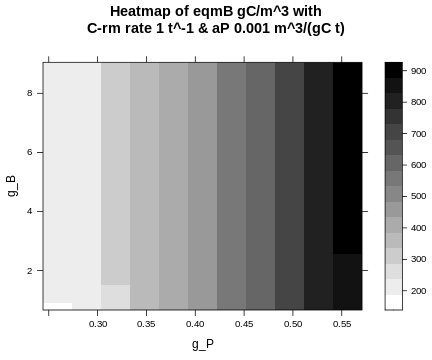

RObject{VecSxp}


In [15]:
R"gPBmap(12, cRiteria[,3], rAw, uNiqRAW)"

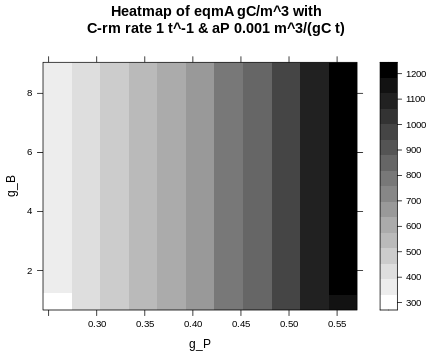

RObject{VecSxp}


In [16]:
R"gPBmap(13, cRiteria[,3], rAw, uNiqRAW)"

## $x$=high, $a_P$=high

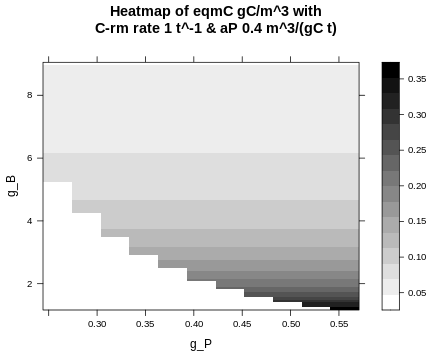

RObject{VecSxp}


In [17]:
R"gPBmap(10, cRiteria[,4], rAw, uNiqRAW)"

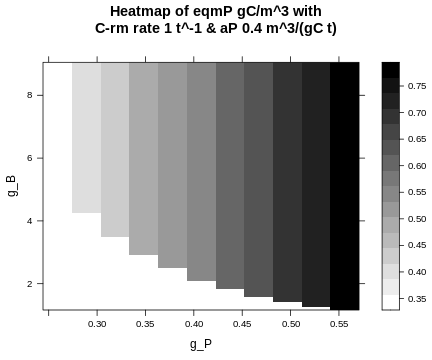

RObject{VecSxp}


In [18]:
R"gPBmap(11, cRiteria[,4], rAw, uNiqRAW)"

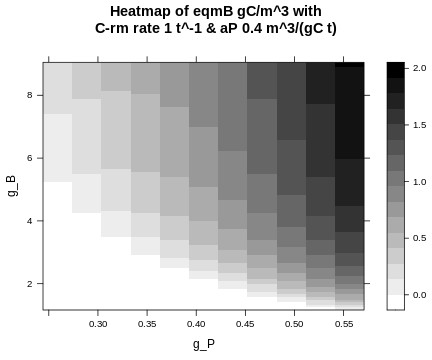

RObject{VecSxp}


In [19]:
R"gPBmap(12, cRiteria[,4], rAw, uNiqRAW)"

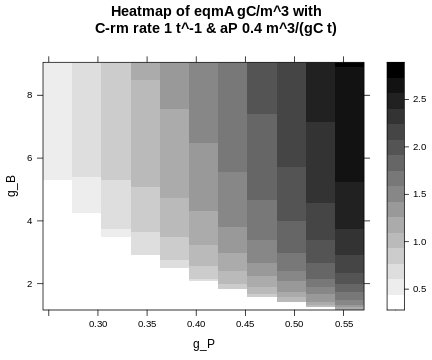

RObject{VecSxp}


In [20]:
R"gPBmap(13, cRiteria[,4], rAw, uNiqRAW)"

## $x$=mid, $a_P$=mid

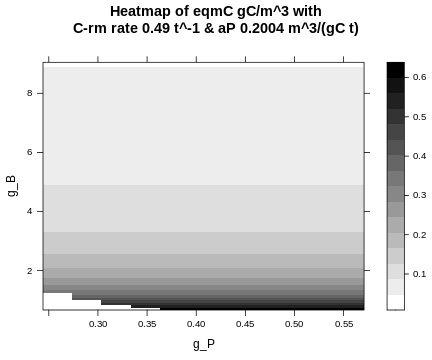

RObject{VecSxp}


In [21]:
R"gPBmap(10, cRiteria[,5], rAw, uNiqRAW)"

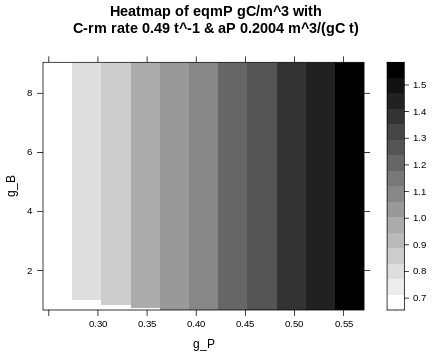

RObject{VecSxp}


In [22]:
R"gPBmap(11, cRiteria[,5], rAw, uNiqRAW)"

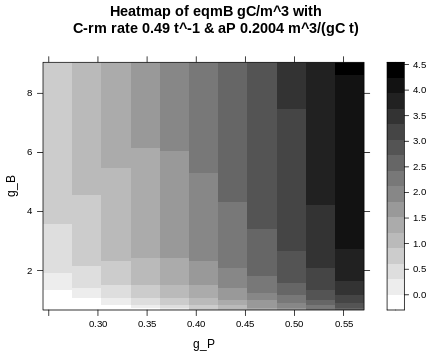

RObject{VecSxp}


In [23]:
R"gPBmap(12, cRiteria[,5], rAw, uNiqRAW)"

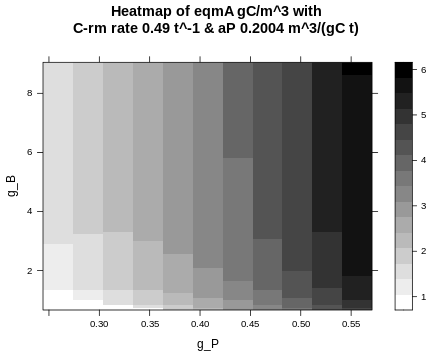

RObject{VecSxp}


In [24]:
R"gPBmap(13, cRiteria[,5], rAw, uNiqRAW)"

# numerical analysis on temporal axis

In [25]:
function ebc7(Den,t,x, g_P,e_PR,e_P,a_P, g_B,e_BR,e_B,m_B)
    
    ## variable sorting
    C = Den[:1]
    P = Den[:2]
    B = Den[:3]
    
    ## rate calculation
    dC = g_P*e_PR*(1-e_P)*P +a_P*P^2 +g_B*(e_BR*(1-e_B)-1)*C*B +m_B*B -x*C
    dP = g_P*e_PR*e_P*P -a_P*P^2
    dB = g_B*e_BR*e_B*C*B -m_B*B
    
    return(sc.array([dC,dP,dB]))
    
end

ebc7 (generic function with 1 method)

In [26]:
@rget uNiqRAW cRiteria

function ebcPlt(tStp,eNd, sItuation, x,y, cRiteria,uNiqRAW)
    t = sc.linspace(0, eNd, tStp) # sample time series
    if(sItuation=="LL");coL=1;elseif(sItuation=="LH");coL=2;elseif(sItuation=="HL");coL=3;elseif(sItuation=="HH");coL=4;else coL=5;end # set heatmap situation
    if(x=="L");x=1;else x=length(uNiqRAW[4]);end
    if(y=="L");y=1;else y=length(uNiqRAW[8]);end
    
    ## collect arguments
    aRg = [uNiqRAW[1][Int(cRiteria[1,coL])],
            uNiqRAW[2][Int(cRiteria[2,coL])],
            uNiqRAW[3][Int(cRiteria[3,coL])],
            uNiqRAW[4][x],
            uNiqRAW[5][Int(cRiteria[5,coL])],
            uNiqRAW[6][Int(cRiteria[6,coL])],
            uNiqRAW[7][Int(cRiteria[7,coL])],
            uNiqRAW[8][y],
            uNiqRAW[9][Int(cRiteria[9,coL])]]
    
    pops, infodict = itg.odeint(ebc7, sc.array([.1/100000000000,.1/100000000000,.1/100000000000]), t, full_output=true, args=(aRg[1],aRg[2],aRg[3],aRg[4],aRg[5],aRg[6],aRg[7],aRg[8],aRg[9]))
    pops = DataFrame(pops)
    pops[:,:x4] = pops[:,:x1]+pops[:,:x2]+pops[:,:x3]
    pops = Array(pops)
    
    plot(pops, xlabel="time steps", ylabel="carbon density (gm^-3)",
        title=string(eNd)*" days progression on carbon density with parameters\nx="*string(aRg[1])*", ePR="*string(aRg[2])*", eP="*string(aRg[3])*", gP="*string(aRg[4])*", aP="*string(aRg[5])*",\neBR="*string(aRg[6])*", eB="*string(aRg[7])*", gB="*string(aRg[8])*", mB="*string(aRg[9]),
        lab=["organic carbon" "phytoplankton" "bacterial decomposer" "total carbon"])
end

ebcPlt (generic function with 1 method)

In [27]:
tIme = 100
eNd = 1000

1000

## $g_P$=low, $g_B$=low

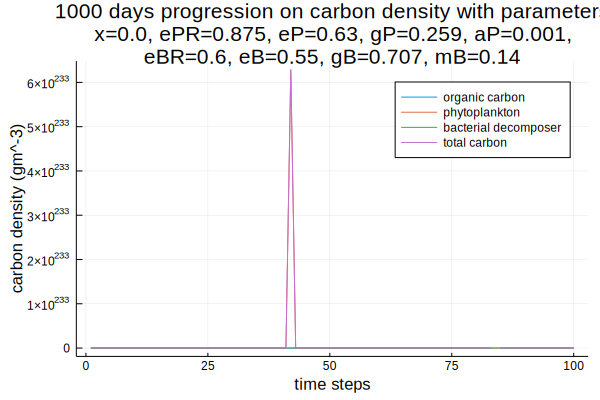

In [28]:
ebcPlt(tIme,eNd,"LL","L","L",cRiteria,uNiqRAW)

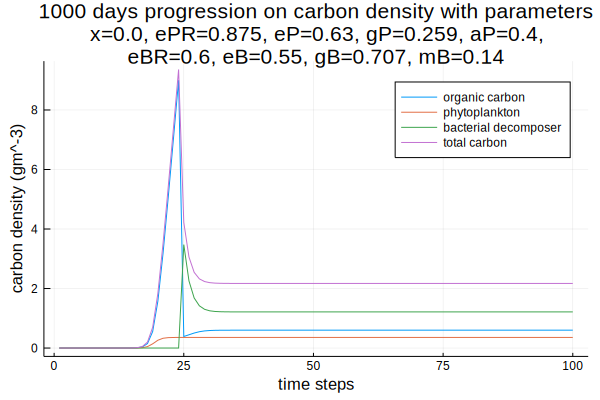

In [29]:
ebcPlt(tIme,eNd,"LH","L","L",cRiteria,uNiqRAW)

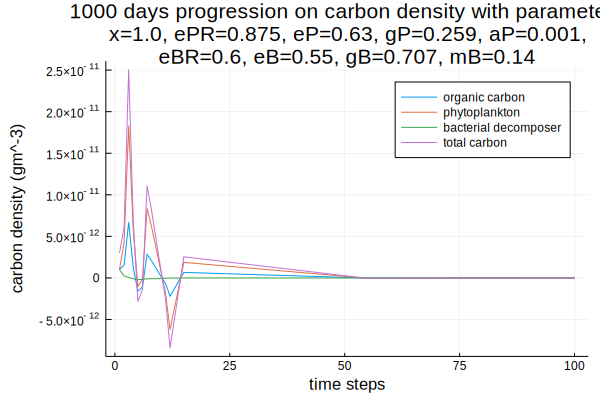

In [30]:
ebcPlt(tIme,eNd,"HL","L","L",cRiteria,uNiqRAW)

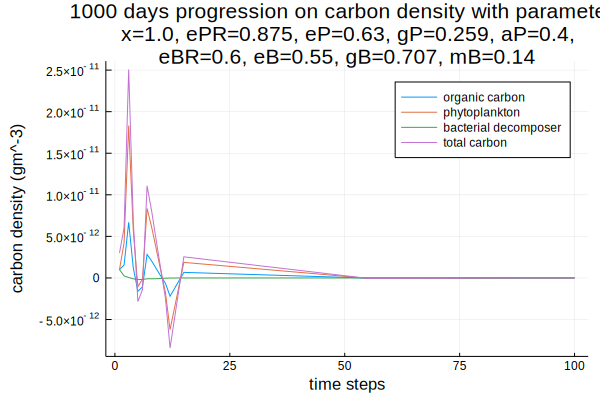

In [31]:
ebcPlt(tIme,eNd,"HH","L","L",cRiteria,uNiqRAW)

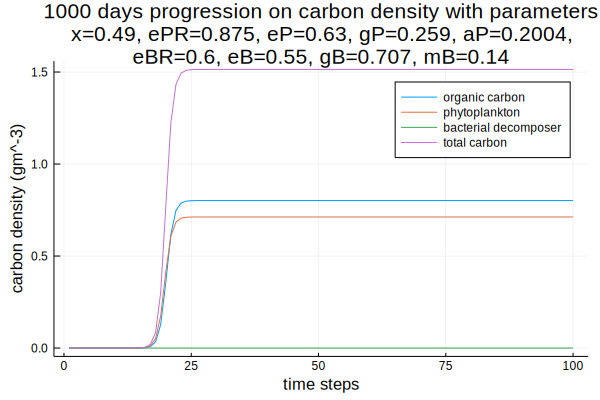

In [32]:
ebcPlt(tIme,eNd,"MM","L","L",cRiteria,uNiqRAW)

## $g_P$=low, $g_B$=high

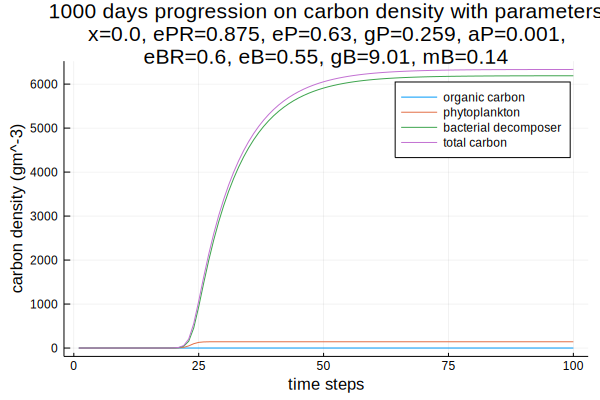

In [33]:
ebcPlt(tIme,eNd,"LL","L","H",cRiteria,uNiqRAW)

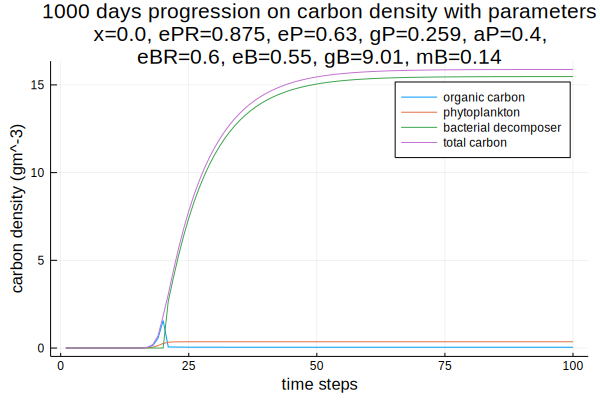

In [34]:
ebcPlt(tIme,eNd,"LH","L","H",cRiteria,uNiqRAW)

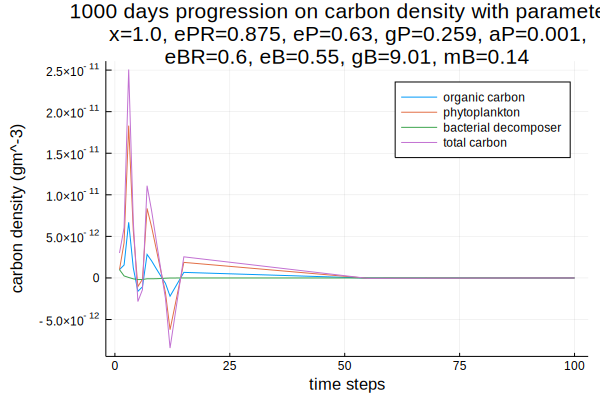

In [35]:
ebcPlt(tIme,eNd,"HL","L","H",cRiteria,uNiqRAW)

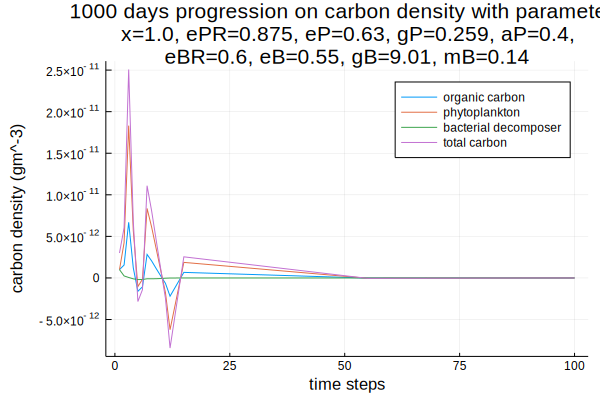

In [36]:
ebcPlt(tIme,eNd,"HH","L","H",cRiteria,uNiqRAW)

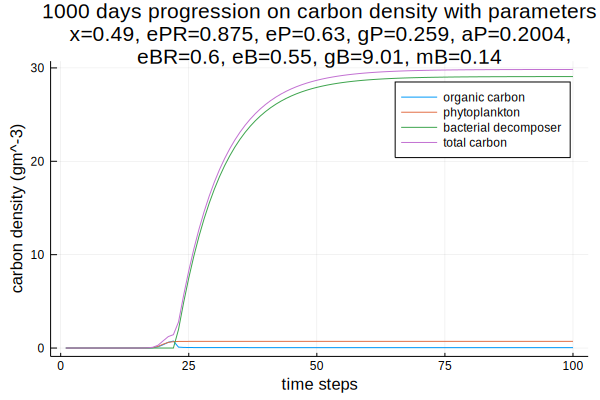

In [37]:
ebcPlt(tIme,eNd,"MM","L","H",cRiteria,uNiqRAW)

## $g_P$=high, $g_B$=low

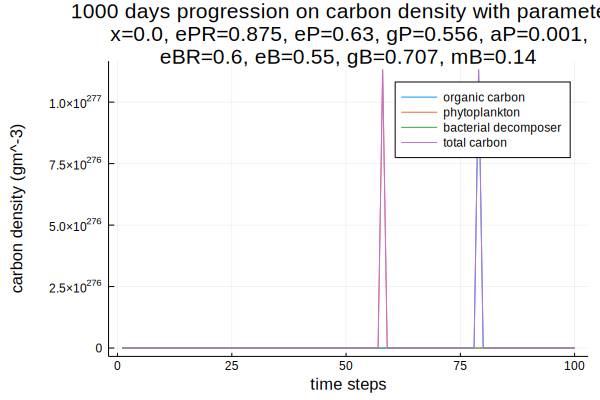

In [38]:
ebcPlt(tIme,eNd,"LL","H","L",cRiteria,uNiqRAW)

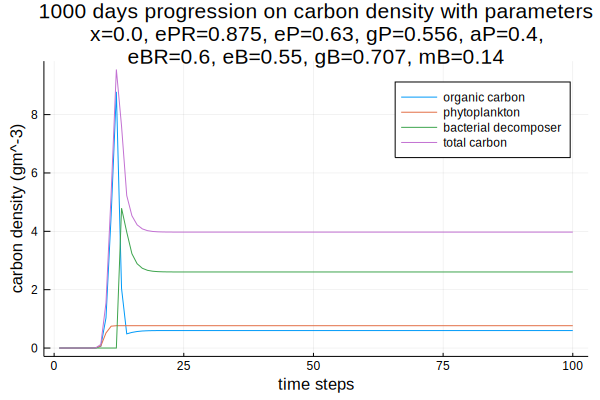

In [39]:
ebcPlt(tIme,eNd,"LH","H","L",cRiteria,uNiqRAW)

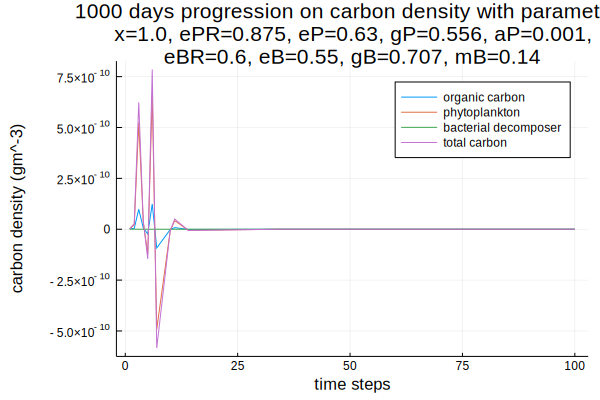

In [40]:
ebcPlt(tIme,eNd,"HL","H","L",cRiteria,uNiqRAW)

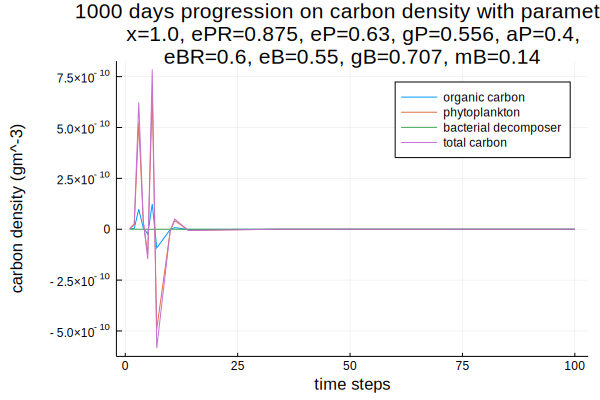

In [41]:
ebcPlt(tIme,eNd,"HH","H","L",cRiteria,uNiqRAW)

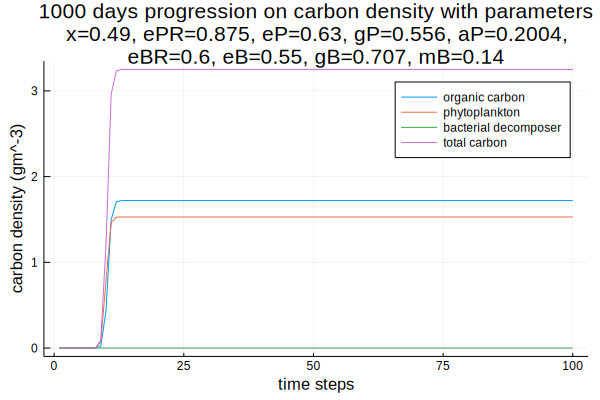

In [42]:
ebcPlt(tIme,eNd,"MM","H","L",cRiteria,uNiqRAW)

## $g_P$=high, $g_B$=high

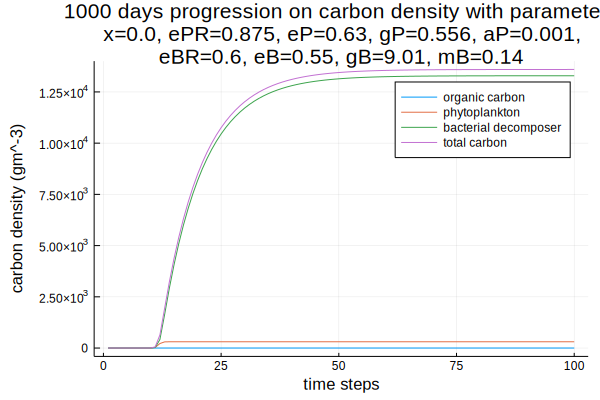

In [43]:
ebcPlt(tIme,eNd,"LL","H","H",cRiteria,uNiqRAW)

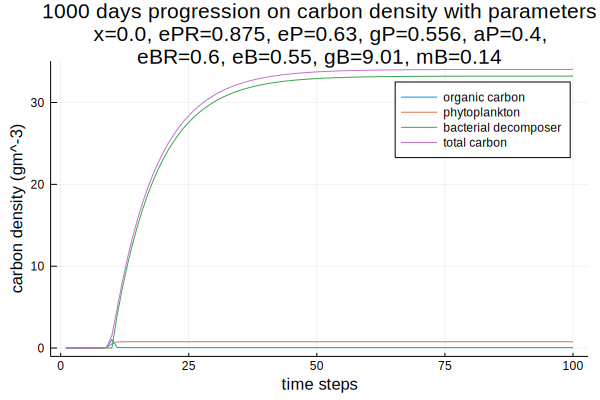

In [44]:
ebcPlt(tIme,eNd,"LH","H","H",cRiteria,uNiqRAW)

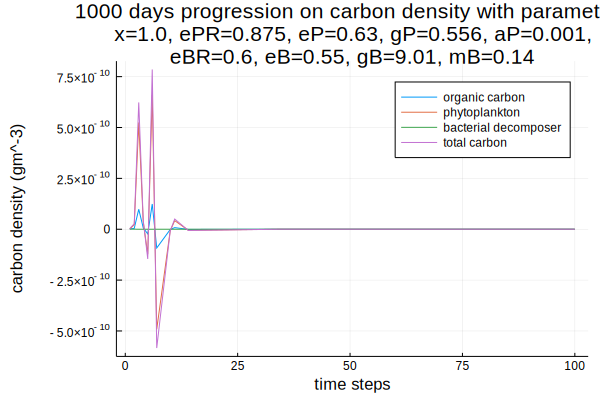

In [45]:
ebcPlt(tIme,eNd,"HL","H","H",cRiteria,uNiqRAW)

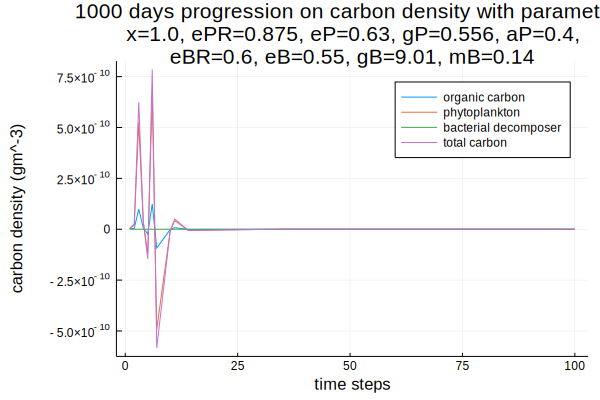

In [46]:
ebcPlt(tIme,eNd,"HH","H","H",cRiteria,uNiqRAW)

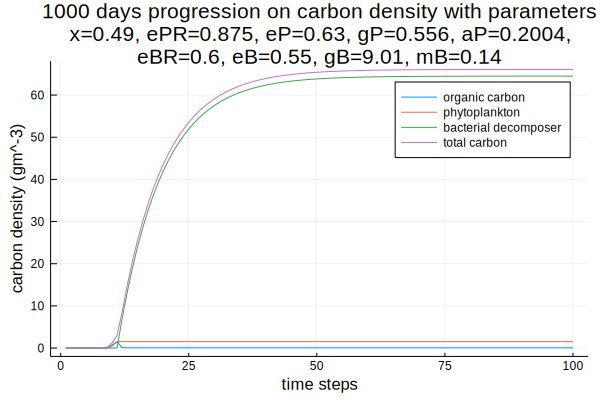

In [47]:
ebcPlt(tIme,eNd,"MM","H","H",cRiteria,uNiqRAW)